Ранее выявлено, что в линейной регрессионной модели с 90% точности ген [ENSG00000014257.16](https://portal.gdc.cancer.gov/genes/ENSG00000014257) с коэффициентом 0.000047 (вторым по абсолютной величине) является значимым при возникновении рецидива рака простаты.

Этот ген кодирует фермент, катализирующий превращение ортофосфорного моноэфира в спирт и ортофосфат. Он синтезируется под регуляцией андрогенов и секретируется эпителиальными клетками предстательной железы. Для этого гена был обнаружен альтернативно сплайсированный вариант транскрипта, кодирующий более длинную изоформу. Эта изоформа содержит трансмембранный домен и локализуется в плазматической мембране-эндосомально-лизосомальном пути. [предоставлено RefSeq, сентябрь 2008 г.]



Воспользуемся профессиональной библиотекой для анализа экспрессий генов deseq2 https://github.com/owkin/PyDESeq2?tab=readme-ov-file#installation

In [5]:
!pip install pydeseq2

In [6]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd

In [7]:
df_unsured = pd.read_csv('/content/df_patient_operation_unsured_about_new_tumor_occurance.csv')
df_dates = pd.read_csv('/content/df_patient_operation_with_dates_NO_DUBS.csv')

df_dates = df_dates.drop('Unnamed: 0', axis=1)
df_dates = df_dates.drop(labels=7, axis=0) #Unknown outcome of tumor пациента TCGA-XK-AAJ3

<ipython-input-7-48cd2fb0cece>:1: DtypeWarning: Columns (281,2191,2590,2623,2818,3051,3090,3325,3953,5388,5407,5408,5481,5492,5510,5512,5670,5694,5767,6032,6180,6182,6183,6184,6193,6239,6285,6379,6413,6468,6469,6627,7263,7287,7348,7538,7844,7975,8066,8188,8246,8272,8275,8302,8617,8686,8792,8837,8866,9018,9019,9033,9119,9287,10003,10158,10255,10355,10636,10810,10940,10941,11369,11386,11420,11426,11737,11774,11834,11913,12085,12149,12210,12286,12402,12511,12515,12517,12605,12670,12675,12676,12677,12683,12713,12752,12772,12953,12965,13096,13180,13228,13229,13230,13243,13263,13267,13280,13286,13311,13314,13317,13322,13354,13373,13496,13498,13519,13672,13777,13781,13782,13793,13795,13797,13826,13865,13881,14028,14037,14045,14065,14097,14099,14103,14110,14123,14134,14136,14138,14145,14149,14161,14203,14237,14247,14251,14252,14259,14263,14281,14323,14345,14350,14432,14514,14542,14569,14594,14626,14635,14711,14761,14793,14860,14863,14864,14951,15019,15022,15032,15053,15080,15083,15090,15092,15

In [8]:
df_dates_genes_id_only = df_dates.set_index('ID').drop(list(df_dates.columns)[60661:], axis=1)
df_dates_condition_only = pd.DataFrame(df_dates.set_index('ID')[list(df_dates.columns)[60662]])

In [9]:
df_dates_genes_id_only.head(5)

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID,,,,,,,,,,,,,,,,,,,,,
TCGA-EJ-7325,3026,0,894,542,41,70,373,3124,985,567,...,0,0,6,0,0,0,108,0,3,35
TCGA-EJ-A65J,3089,1,1836,847,161,234,473,4509,2808,2105,...,0,0,9,0,0,0,299,0,5,21
TCGA-EJ-A46G,4427,4,868,518,230,128,511,2004,817,2072,...,0,0,41,0,0,0,77,0,7,53
TCGA-KK-A7B3,2701,2,1495,783,150,897,1212,3222,2019,1716,...,0,0,64,0,1,0,408,0,13,65
TCGA-EJ-A6RC,3745,49,1329,897,208,427,2215,2642,2092,1205,...,0,0,11,0,0,0,332,0,9,33


In [10]:
df_dates_condition_only.head(10)

,new_tumor_event_dx_indicator
ID,
TCGA-EJ-7325,NO
TCGA-EJ-A65J,NO
TCGA-EJ-A46G,NO
TCGA-KK-A7B3,YES
TCGA-EJ-A6RC,NO
TCGA-HC-7233,NO
TCGA-QU-A6IM,NO
TCGA-HC-7821,YES
TCGA-CH-5772,NO


Создается Десек датасет с метаданными по результатам исследований и сами данными, на которых основаны результаты, с экспрессией генов.

Здесь design_factors - это столбцы из metadata, которые являются результирующим фактором  

In [11]:
dds_Dataset = DeseqDataSet(counts=df_dates_genes_id_only, metadata=df_dates_condition_only, design_factors='new_tumor_event_dx_indicator')

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
<ipython-input-11-473c62bfee94>:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds_Dataset = DeseqDataSet(counts=df_dates_genes_id_only, metadata=df_dates_condition_only, design_factors='new_tumor_event_dx_indicator')


In [12]:
dds_Dataset

AnnData object with n_obs × n_vars = 24 × 60660
    obs: 'new-tumor-event-dx-indicator'
    obsm: 'design_matrix'

In [13]:
print(dds_Dataset.obs) #метаданные
print(dds_Dataset.X) #данные генов

             new-tumor-event-dx-indicator
ID                                       
TCGA-EJ-7325                           NO
TCGA-EJ-A65J                           NO
TCGA-EJ-A46G                           NO
TCGA-KK-A7B3                          YES
TCGA-EJ-A6RC                           NO
TCGA-HC-7233                           NO
TCGA-QU-A6IM                           NO
TCGA-HC-7821                          YES
TCGA-CH-5772                           NO
TCGA-EJ-7312                           NO
TCGA-CH-5790                           NO
TCGA-EJ-7791                           NO
TCGA-EJ-7123                           NO
TCGA-EJ-7123                           NO
TCGA-J4-A83N                          YES
TCGA-EJ-5542                           NO
TCGA-G9-6364                           NO
TCGA-EJ-A46B                           NO
TCGA-CH-5763                           NO
TCGA-HC-7748                           NO
TCGA-CH-5791                          YES
TCGA-CH-5791                      

Базовая статистика, содержащая данные по дисперсии генной экспрессии и изменений в соотношении имеющих рецидив пацентов к неимеющим

In [14]:
dds_Dataset.deseq2() #подсчет дисперсий и LFC

stat = DeseqStats(dds=dds_Dataset, contrast=["new-tumor-event-dx-indicator", "YES", "NO"])
stat.summary()

Fitting size factors...
... done in 0.09 seconds.

Fitting dispersions...
... done in 80.97 seconds.

Fitting dispersion trend curve...
... done in 1.87 seconds.

Fitting MAP dispersions...
... done in 96.87 seconds.

Fitting LFCs...
... done in 54.12 seconds.

Calculating cook's distance...
... done in 0.17 seconds.

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Replacing 1735 outlier genes.

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Fitting dispersions...
... d

Log2 fold change & Wald test p-value: new-tumor-event-dx-indicator YES vs NO
                       baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003.15  3270.854610       -0.494565  0.202030 -2.447973  0.014366   
ENSG00000000005.6     14.195822       -3.779258  0.955012 -3.957289  0.000076   
ENSG00000000419.13  1267.345092        0.089781  0.162229  0.553419  0.579976   
ENSG00000000457.14   835.975815        0.135900  0.240653  0.564715  0.572267   
ENSG00000000460.17   167.943642        0.244395  0.233973  1.044547  0.296232   
...                         ...             ...       ...       ...       ...   
ENSG00000288669.1      0.034294       -0.213052  3.691396 -0.057716  0.953975   
ENSG00000288670.1    282.369855       -0.068785  0.264792 -0.259769  0.795042   
ENSG00000288671.1      0.000000             NaN       NaN       NaN       NaN   
ENSG00000288674.1      5.737542        0.871846  0.421231  2.069756  0.038475   
ENSG00000288675.1     30.756549 

... done in 17.38 seconds.



In [15]:
stat_df = stat.results_df #DataFrame данные по экспрессиям генов
stat_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.15,3270.854610,-0.494565,0.202030,-2.447973,0.014366,0.180646
ENSG00000000005.6,14.195822,-3.779258,0.955012,-3.957289,0.000076,0.012300
ENSG00000000419.13,1267.345092,0.089781,0.162229,0.553419,0.579976,0.857288
ENSG00000000457.14,835.975815,0.135900,0.240653,0.564715,0.572267,0.854357
ENSG00000000460.17,167.943642,0.244395,0.233973,1.044547,0.296232,0.684476
...,...,...,...,...,...,...
ENSG00000288669.1,0.034294,-0.213052,3.691396,-0.057716,0.953975,NaN
ENSG00000288670.1,282.369855,-0.068785,0.264792,-0.259769,0.795042,0.941974
ENSG00000288671.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000288674.1,5.737542,0.871846,0.421231,2.069756,0.038475,0.285398


In [25]:
stat_df = stat_df[(stat_df.baseMean >= 20) & (abs(stat_df.log2FoldChange) > 1 & (stat_df.padj < 0.05))] #убираются из таблицы все мало выраженные гены
stat_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.15,3270.854610,-0.494565,0.202030,-2.447973,0.014366,0.180646
ENSG00000000419.13,1267.345092,0.089781,0.162229,0.553419,0.579976,0.857288
ENSG00000000457.14,835.975815,0.135900,0.240653,0.564715,0.572267,0.854357
ENSG00000000460.17,167.943642,0.244395,0.233973,1.044547,0.296232,0.684476
ENSG00000000938.13,229.393680,0.357342,0.290410,1.230476,0.218519,0.609899
...,...,...,...,...,...,...
ENSG00000288596.2,120.101338,0.353419,0.312336,1.131536,0.257830,0.646935
ENSG00000288611.1,22.747171,0.275146,0.511805,0.537599,0.590854,0.860603
ENSG00000288612.1,42.090872,0.495903,0.501660,0.988524,0.322896,0.703404
ENSG00000288670.1,282.369855,-0.068785,0.264792,-0.259769,0.795042,0.941974


Данные по проверяемому гену.

**baseMean** - среднее из нормализованных значений отсчётов, разделённое на факторы размера. Ген активно изменился.

**log2FoldChange** - оценка размера эффекта (в данном случае у пациентов с рецидивом данный ген уменьшается с коэффициентом  2**(-1.35) или меняется с коэффициентом 0.39229)

**lfcSE** - Оценка стандартной ошибки для оценки изменения в кратности log2

**stat** - значение тестовой статистики для гена или транскрипта

**pvalue** - P-значение теста для гена или транскрипта.

**padj** - скорректированное значение P для множественного тестирования гена или транскрипта


Так, наблюдается явное изменение гена в среднем среди пациентов почти в два раза. [Однако статистически это ни о чем не говорит.](https://varmara.github.io/proteomics/04_differential_expression_analysis.html)

л


In [26]:
stat_df.loc['ENSG00000014257.16']

,ENSG00000014257.16
baseMean,324938.852112
log2FoldChange,-1.350143
lfcSE,0.407178
stat,-3.315853
pvalue,0.000914
padj,0.046206


In [27]:
ranking = stat_df[['stat']].sort_values('stat', ascending = False)
ranking

,stat
ENSG00000135346.9,8.493851
ENSG00000049089.15,5.934820
ENSG00000223350.2,5.691787
ENSG00000104368.19,5.504116
ENSG00000082196.21,5.491169
...,...
ENSG00000091138.13,-5.310418
ENSG00000223930.7,-5.327206
ENSG00000180660.8,-5.377938
ENSG00000253821.2,-5.718009


In [19]:
!pip install scanpy

import scanpy as scan

scan.tl.pca(data = dds_Dataset, random_state = 42)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=489aaef72f87fc3805815eca939f3a5a10a4fd89ba08ea60d1c65ac5330dae77
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


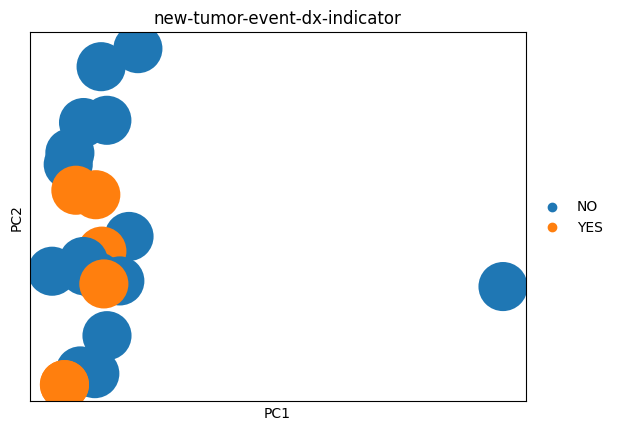

In [20]:
scan.pl.pca(dds_Dataset, color = 'new-tumor-event-dx-indicator') #вычисляет PCA координаты, нагрузку и декомпозицию

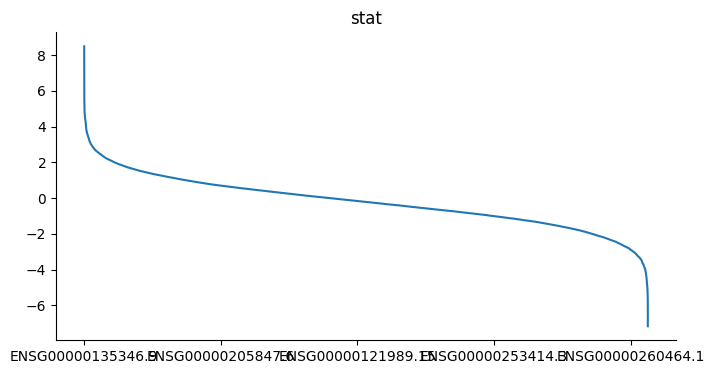

In [22]:
# @title stat

from matplotlib import pyplot as plt
ranking['stat'].plot(kind='line', figsize=(8, 4), title='stat')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
ranking.loc['ENSG00000014257.16']

,ENSG00000014257.16
stat,-3.315853


In [24]:
# !pip install gseapy
# import gseapy as gp

# gp.get_library_name()